# The analysis of Precision-Recall Trade off using custom mode of CorrectionGLM

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import seaborn as sns
import numpy as np

## Functions for plotting

In [11]:

def heatmap(single_dataframe: pd.DataFrame):
    plt.figure(dpi=120)
    single_dataframe.index = single_dataframe['INSERT'].to_list()
    df = single_dataframe.drop(columns=['INSERT'])
    df = df.mul(100)
    # print(df)
    sns.heatmap(data=df, annot=False, fmt='.4g', cmap='Reds', linewidths=0.1, linecolor='white')
    plt.xlabel("ERROR Threshold")
    plt.ylabel("INSERT Threshold")
    plt.title("Precision-Recall Trade off by setting detection threshold")


def pre_rec_scatter(dataframes: Dict[str, Tuple[pd.DataFrame, pd.DataFrame]], f_05_lines: List[float]):
    # keep threshold: precision dataframe, recall dataframe
    dots = {'Precision': [], 'Recall': [], 'Group': []}
    for keep_th in dataframes:
        precision_df = dataframes[keep_th][0]
        recall_df = dataframes[keep_th][1]
        columns = list(precision_df.columns)
        assert columns == list(recall_df.columns)
        assert columns[0] == 'INSERT'

        for (i1, precision_item), (i2, recall_item) in zip(precision_df.iterrows(), recall_df.iterrows()):
            for column in columns[1:]:
                precision = precision_item[column]
                recall = recall_item[column]
                dots['Precision'].append(precision)
                dots['Recall'].append(recall)
                dots['Group'].append('KEEP '+keep_th)
        
    sns.scatterplot(data=dots, x='Precision', y='Recall', hue='Group')
    
        

def get_all_dataframe(directory):
    dataframes = {}
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            base_name = file.replace('.csv', '')
            _, keep_threshold, metric = base_name.split('_', 2)
            if keep_threshold not in dataframes:
                dataframes[keep_threshold] = {}
            dataframes[keep_threshold][metric] = pd.read_csv(os.path.join(directory, file))
    return dataframes


def get_precision_recall_dataframe(directory):
    all_dataframes = get_all_dataframe(directory)
    pr_dataframes = {}
    for keep_th in all_dataframes:
        pr_dataframes[keep_th] = (all_dataframes[keep_th]['p'], all_dataframes[keep_th]['r'])
    return pr_dataframes


def analysis(directory):
    pass
    


## Pre-Rec Trade off under single KEEP threshold

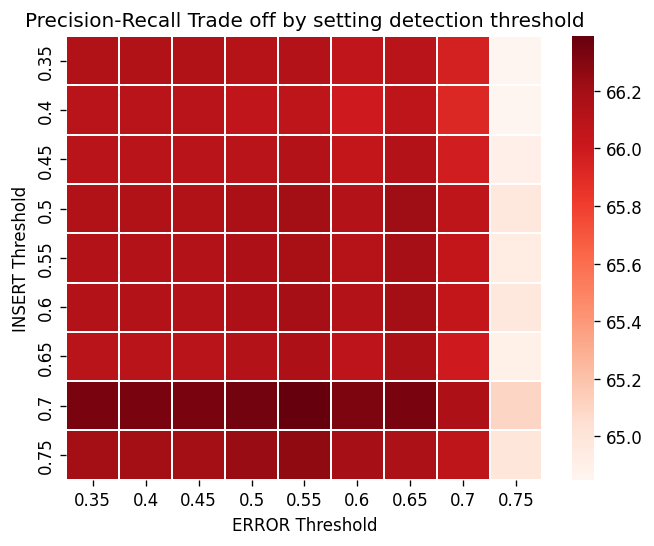

In [12]:
heatmap(pd.read_csv('../results_new/correctionglm-wilocness-custom-20240103-2249/keep_0.36_f_05.csv'))

## Pre-Rec Relationship

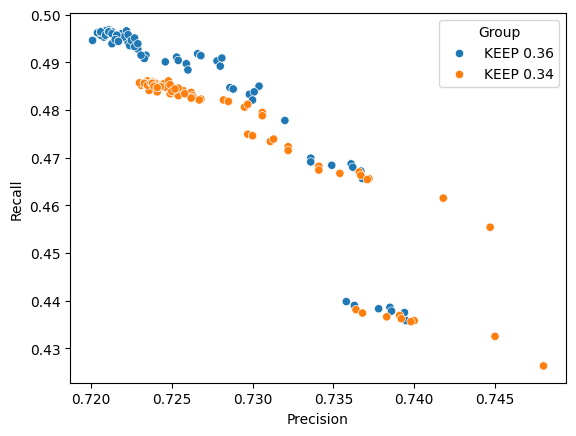

In [13]:
pre_rec_scatter(dataframes=get_precision_recall_dataframe('../results_new/correctionglm-wilocness-custom-20240103-2249/'), f_05_lines=[])

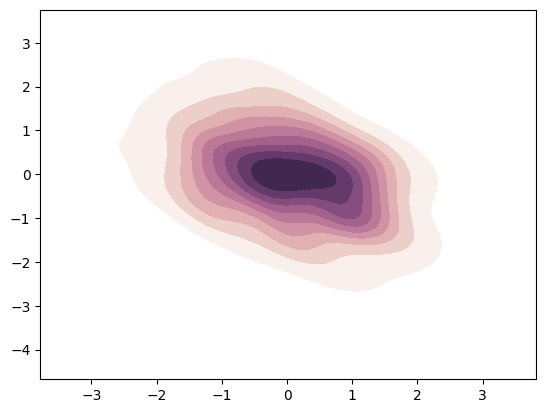

In [2]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True)

plt.show()